In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# Load the dataset
file_location = "C:/Users/Francesco/NBA Points Scored Models/data/2023_nba_player_stats.csv" #insert the local path on your machine
data = pd.read_csv(file_location, encoding='latin-1')

In [4]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [5]:
data

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,1328,54.8,66,200,33.0,661,771,85.7,113,557,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,1449,49.6,185,541,34.2,515,694,74.2,54,515,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,1381,51.0,58,168,34.5,669,739,90.5,59,270,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,1278,55.3,47,171,27.5,498,772,64.5,137,605,742,359,246,52,51,197,3451,46,6,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Alondes Williams,G,BKN,23,1,1,0,5.3,0,0,0,0.0,0,0,0.0,0,0,0.0,0,1,1,0,2,0,0,1,-1,0,0,-5
535,Deonte Burton,SF,SAC,29,2,1,1,6.5,0,0,2,0.0,0,1,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,5
536,Frank Jackson,SG,UTA,24,1,0,1,5.0,0,0,3,0.0,0,1,0.0,0,0,0.0,1,1,2,1,0,0,0,0,4,0,0,-2
537,Michael Foster Jr.,PF,PHI,20,1,1,0,1.0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-2


In [6]:
# dropping players with less than 200 minutes in a season 
data = data[data['Min'] > 200]
data

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,1328,54.8,66,200,33.0,661,771,85.7,113,557,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,1449,49.6,185,541,34.2,515,694,74.2,54,515,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,1381,51.0,58,168,34.5,669,739,90.5,59,270,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,1278,55.3,47,171,27.5,498,772,64.5,137,605,742,359,246,52,51,197,3451,46,6,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Trent Forrest,G,ATL,24,23,9,14,277.0,52,25,60,41.7,0,2,0.0,2,3,66.7,5,32,37,38,15,7,2,17,165,0,0,-58
443,Thanasis Antetokounmpo,SF,MIL,30,37,25,12,206.2,51,20,46,43.5,0,8,0.0,11,22,50.0,15,29,44,15,12,3,3,22,132,0,0,-114
447,Matthew Dellavedova,PG,SAC,32,32,19,13,212.8,47,17,50,34.0,9,27,33.3,4,7,57.1,1,12,13,41,10,7,0,20,135,0,0,-51
449,KZ Okpala,SF,SAC,24,35,19,16,248.0,46,16,38,42.1,7,21,33.3,7,8,87.5,7,27,34,13,7,7,7,39,141,0,0,-11


In [6]:
# in general, it is more useful to have per game statistics
# since I don't need to apply this data transformation to some columns, the easiest way to achieve it is to swap those columns to the left 
data = data[['PName','POS','Team','Age','GP','W','L','FG%','3P%','FT%','DD2','TD3','Min','PTS','FGM','FGA','3PM','3PA','FTM','FTA','OREB','DREB','REB','AST','TOV','STL','BLK','PF','FP','+/-']]
# computing per game stats, rounding up to 2 decimals
for col in data.columns[12:]:
    data[col] = data.apply(lambda row: round(row[col] / row['GP'],2), axis=1)


In [7]:
data

,PName,POS,Team,Age,GP,W,L,FG%,3P%,FT%,DD2,TD3,Min,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,46.6,35.0,85.4,31,1,36.92,30.07,9.82,21.07,3.24,9.27,7.18,8.41,1.05,7.72,8.77,4.62,2.88,1.05,0.69,2.16,49.88,6.35
1,Joel Embiid,C,PHI,29,66,43,23,54.8,33.0,85.7,39,1,34.61,33.08,11.03,20.12,1.00,3.03,10.02,11.68,1.71,8.44,10.15,4.15,3.42,1.00,1.70,3.11,56.15,6.42
2,Luka Doncic,PG,DAL,24,66,33,33,49.6,34.2,74.2,36,10,36.22,32.39,10.89,21.95,2.80,8.20,7.80,10.52,0.82,7.80,8.62,8.02,3.58,1.36,0.50,2.52,56.77,1.94
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,51.0,34.5,90.5,3,0,35.53,31.40,10.35,20.31,0.85,2.47,9.84,10.87,0.87,3.97,4.84,5.46,2.82,1.65,0.96,2.82,50.37,2.19
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,55.3,27.5,64.5,46,6,32.12,31.10,11.22,20.29,0.75,2.71,7.90,12.25,2.17,9.60,11.78,5.70,3.90,0.83,0.81,3.13,54.78,5.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Trent Forrest,G,ATL,24,23,9,14,41.7,0.0,66.7,0,0,12.04,2.26,1.09,2.61,0.00,0.09,0.09,0.13,0.22,1.39,1.61,1.65,0.65,0.30,0.09,0.74,7.17,-2.52
443,Thanasis Antetokounmpo,SF,MIL,30,37,25,12,43.5,0.0,50.0,0,0,5.57,1.38,0.54,1.24,0.00,0.22,0.30,0.59,0.41,0.78,1.19,0.41,0.32,0.08,0.08,0.59,3.57,-3.08
447,Matthew Dellavedova,PG,SAC,32,32,19,13,34.0,33.3,57.1,0,0,6.65,1.47,0.53,1.56,0.28,0.84,0.12,0.22,0.03,0.38,0.41,1.28,0.31,0.22,0.00,0.62,4.22,-1.59
449,KZ Okpala,SF,SAC,24,35,19,16,42.1,33.3,87.5,0,0,7.09,1.31,0.46,1.09,0.20,0.60,0.20,0.23,0.20,0.77,0.97,0.37,0.20,0.20,0.20,1.11,4.03,-0.31


In [8]:
# Feature selection
features = data.columns
features

Index(['PName', 'POS', 'Team', 'Age', 'GP', 'W', 'L', 'FG%', '3P%', 'FT%',
       'DD2', 'TD3', 'Min', 'PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', '+/-'],
      dtype='object')

In [9]:
X = data[features]
X = X.drop(columns=['PName','POS','Team','W','L','FP'])
print(X)

     Age  GP   FG%   3P%   FT%  DD2  TD3    Min    PTS    FGM    FGA   3PM  \
0     25  74  46.6  35.0  85.4   31    1  36.92  30.07   9.82  21.07  3.24   
1     29  66  54.8  33.0  85.7   39    1  34.61  33.08  11.03  20.12  1.00   
2     24  66  49.6  34.2  74.2   36   10  36.22  32.39  10.89  21.95  2.80   
3     24  68  51.0  34.5  90.5    3    0  35.53  31.40  10.35  20.31  0.85   
4     28  63  55.3  27.5  64.5   46    6  32.12  31.10  11.22  20.29  0.75   
..   ...  ..   ...   ...   ...  ...  ...    ...    ...    ...    ...   ...   
440   24  23  41.7   0.0  66.7    0    0  12.04   2.26   1.09   2.61  0.00   
443   30  37  43.5   0.0  50.0    0    0   5.57   1.38   0.54   1.24  0.00   
447   32  32  34.0  33.3  57.1    0    0   6.65   1.47   0.53   1.56  0.28   
449   24  35  42.1  33.3  87.5    0    0   7.09   1.31   0.46   1.09  0.20   
451   20  19  32.1  22.9  75.0    0    0  11.64   2.37   0.89   2.79  0.42   

      3PA    FTM    FTA  OREB  DREB    REB   AST   TOV   STL   

In [10]:
# Calculate the correlation matrix
correlation_matrix = X.corr()
print(correlation_matrix)

           Age        GP       FG%       3P%       FT%       DD2       TD3  \
Age   1.000000  0.013026  0.030571  0.135648  0.151867  0.056550  0.033236   
GP    0.013026  1.000000  0.127518  0.088100  0.157051  0.295745  0.085177   
FG%   0.030571  0.127518  1.000000 -0.278509 -0.321194  0.343807  0.109632   
3P%   0.135648  0.088100 -0.278509  1.000000  0.416931 -0.134671  0.036618   
FT%   0.151867  0.157051 -0.321194  0.416931  1.000000 -0.016533  0.031934   
DD2   0.056550  0.295745  0.343807 -0.134671 -0.016533  1.000000  0.513513   
TD3   0.033236  0.085177  0.109632  0.036618  0.031934  0.513513  1.000000   
Min   0.111557  0.526351  0.068269  0.143079  0.310065  0.486900  0.201549   
PTS   0.082000  0.355068  0.100571  0.160774  0.345410  0.536817  0.275182   
FGM   0.066395  0.360557  0.163481  0.119857  0.293218  0.567292  0.283272   
FGA   0.058462  0.347523 -0.028061  0.180039  0.360024  0.471632  0.235310   
3PM   0.153201  0.295617 -0.372913  0.438688  0.504881  0.060259

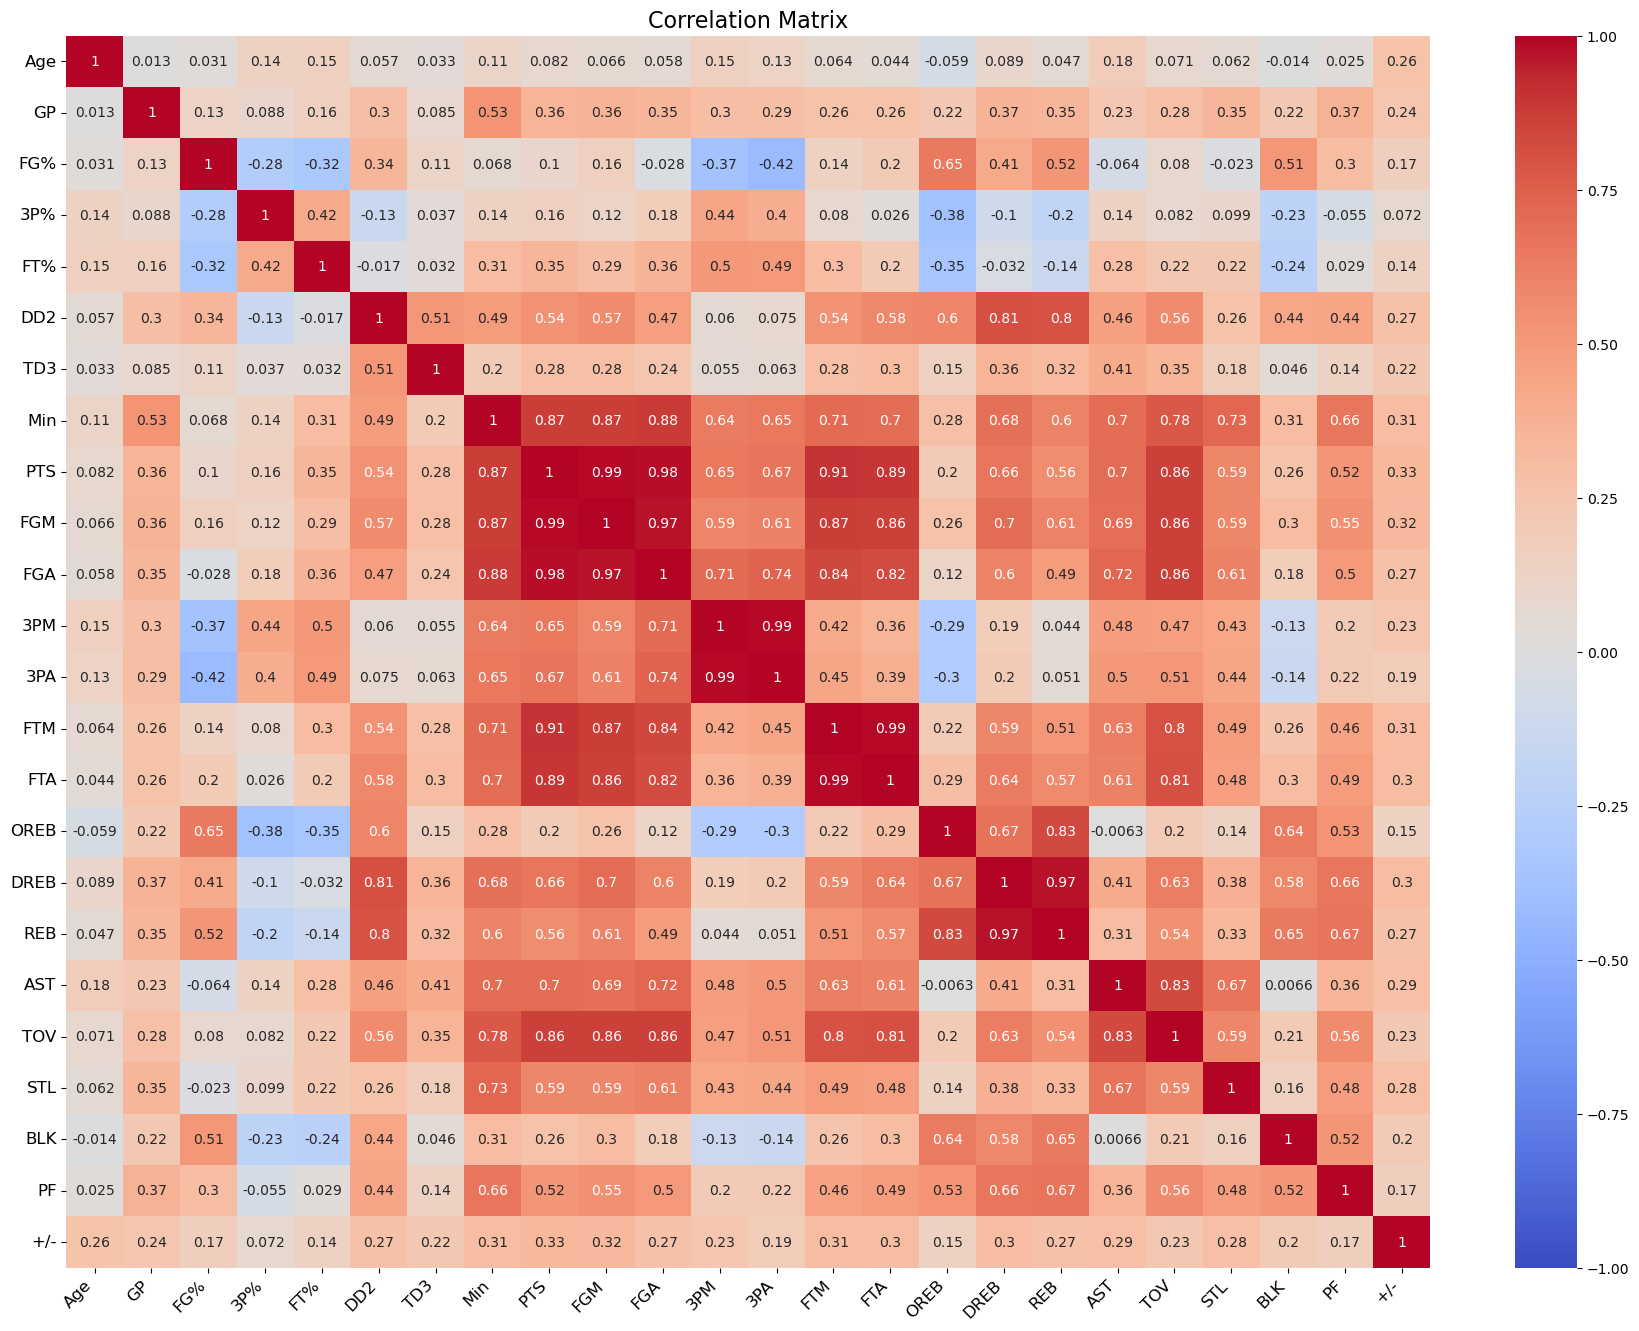

In [11]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(22, 16))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Set the title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()
plt.close()

In [12]:
# Identify highly correlated features
threshold = 0.8
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname1, colname2))

print("Highly correlated pairs:", highly_correlated_pairs)

Highly correlated pairs: [('PTS', 'Min'), ('FGM', 'Min'), ('FGM', 'PTS'), ('FGA', 'Min'), ('FGA', 'PTS'), ('FGA', 'FGM'), ('3PA', '3PM'), ('FTM', 'PTS'), ('FTM', 'FGM'), ('FTM', 'FGA'), ('FTA', 'PTS'), ('FTA', 'FGM'), ('FTA', 'FGA'), ('FTA', 'FTM'), ('DREB', 'DD2'), ('REB', 'DD2'), ('REB', 'OREB'), ('REB', 'DREB'), ('TOV', 'PTS'), ('TOV', 'FGM'), ('TOV', 'FGA'), ('TOV', 'FTM'), ('TOV', 'FTA'), ('TOV', 'AST')]


In [13]:
# Map player roles to numeric values
role_mapping = {role: idx for idx, role in enumerate(data['POS'].unique())}
data['POS'] = data['POS'].map(role_mapping)

In [14]:
X['POS'] = data['POS']
X = X.drop(columns=['GP','PTS'])
X

,Age,FG%,3P%,FT%,DD2,TD3,Min,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,POS
0,25,46.6,35.0,85.4,31,1,36.92,9.82,21.07,3.24,9.27,7.18,8.41,1.05,7.72,8.77,4.62,2.88,1.05,0.69,2.16,6.35,0
1,29,54.8,33.0,85.7,39,1,34.61,11.03,20.12,1.00,3.03,10.02,11.68,1.71,8.44,10.15,4.15,3.42,1.00,1.70,3.11,6.42,1
2,24,49.6,34.2,74.2,36,10,36.22,10.89,21.95,2.80,8.20,7.80,10.52,0.82,7.80,8.62,8.02,3.58,1.36,0.50,2.52,1.94,2
3,24,51.0,34.5,90.5,3,0,35.53,10.35,20.31,0.85,2.47,9.84,10.87,0.87,3.97,4.84,5.46,2.82,1.65,0.96,2.82,2.19,2
4,28,55.3,27.5,64.5,46,6,32.12,11.22,20.29,0.75,2.71,7.90,12.25,2.17,9.60,11.78,5.70,3.90,0.83,0.81,3.13,5.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,24,41.7,0.0,66.7,0,0,12.04,1.09,2.61,0.00,0.09,0.09,0.13,0.22,1.39,1.61,1.65,0.65,0.30,0.09,0.74,-2.52,6
443,30,43.5,0.0,50.0,0,0,5.57,0.54,1.24,0.00,0.22,0.30,0.59,0.41,0.78,1.19,0.41,0.32,0.08,0.08,0.59,-3.08,0
447,32,34.0,33.3,57.1,0,0,6.65,0.53,1.56,0.28,0.84,0.12,0.22,0.03,0.38,0.41,1.28,0.31,0.22,0.00,0.62,-1.59,2
449,24,42.1,33.3,87.5,0,0,7.09,0.46,1.09,0.20,0.60,0.20,0.23,0.20,0.77,0.97,0.37,0.20,0.20,0.20,1.11,-0.31,0


In [15]:
# drop the columns that are highly correlated with points scoring (expected: stats related with field goals and free throws)
# Define the target column
target_column = 'PTS'

# Extract correlations with the target column
correlation_with_target = correlation_matrix[target_column]

# Define the correlation threshold
threshold = 0.8

# Get the names of columns with high correlation with the target column
highly_correlated_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()

# Remove the target column from the list
highly_correlated_features.remove(target_column)

print("Highly correlated features with Points:")
print(highly_correlated_features)

Highly correlated features with Points:
['Min', 'FGM', 'FGA', 'FTM', 'FTA', 'TOV']


In [16]:
X = X.drop(columns=highly_correlated_features)
X

,Age,FG%,3P%,FT%,DD2,TD3,3PM,3PA,OREB,DREB,REB,AST,STL,BLK,PF,+/-,POS
0,25,46.6,35.0,85.4,31,1,3.24,9.27,1.05,7.72,8.77,4.62,1.05,0.69,2.16,6.35,0
1,29,54.8,33.0,85.7,39,1,1.00,3.03,1.71,8.44,10.15,4.15,1.00,1.70,3.11,6.42,1
2,24,49.6,34.2,74.2,36,10,2.80,8.20,0.82,7.80,8.62,8.02,1.36,0.50,2.52,1.94,2
3,24,51.0,34.5,90.5,3,0,0.85,2.47,0.87,3.97,4.84,5.46,1.65,0.96,2.82,2.19,2
4,28,55.3,27.5,64.5,46,6,0.75,2.71,2.17,9.60,11.78,5.70,0.83,0.81,3.13,5.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,24,41.7,0.0,66.7,0,0,0.00,0.09,0.22,1.39,1.61,1.65,0.30,0.09,0.74,-2.52,6
443,30,43.5,0.0,50.0,0,0,0.00,0.22,0.41,0.78,1.19,0.41,0.08,0.08,0.59,-3.08,0
447,32,34.0,33.3,57.1,0,0,0.28,0.84,0.03,0.38,0.41,1.28,0.22,0.00,0.62,-1.59,2
449,24,42.1,33.3,87.5,0,0,0.20,0.60,0.20,0.77,0.97,0.37,0.20,0.20,1.11,-0.31,0


In [17]:
# target
y = data['PTS']
y

0      30.07
1      33.08
2      32.39
3      31.40
4      31.10
       ...  
440     2.26
443     1.38
447     1.47
449     1.31
451     2.37
Name: PTS, Length: 431, dtype: float64

In [18]:
# Handle missing values
X.fillna(X.mean(), inplace=True)

In [19]:
# Preprocess and normalize the dataset
#scaler = StandardScaler()
#scaled_metrics = scaler.fit_transform(X)
#scaled_metrics

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Train the initial model
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
# Predict and evaluate
y_pred = linear.predict(X_test_scaled)
# rounding to 2 decimals 
y_pred = np.round(y_pred, 2)
mae_linear = mean_absolute_error(y_test, y_pred)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Initial MAE: {mae_linear}')
print(f'Initial RMSE: {rmse_linear}')

Initial MAE: 2.171494252873563
Initial RMSE: 2.8032308945707385


In [24]:
from sklearn.metrics import r2_score
r2_linear = r2_score(y_test, y_pred)
r2_list = [round(r2_linear,3)]
print(r2_list)

[0.852]


In [25]:
# Creating a DataFrame with actual and predicted values to visualize the results
comparison_df = pd.DataFrame({'Actual': y_test, 'Linear': y_pred})
print(comparison_df)

     Actual  Linear
426    5.47    7.20
75    15.20   15.87
296    6.91    4.42
30    23.15   20.84
362    6.46    4.85
..      ...     ...
57    16.58   18.89
124   13.88   20.58
24    28.91   26.26
17    22.14   18.03
66    17.96   14.50

[87 rows x 2 columns]


In [26]:
# Get feature importance
linear_feature_importance = pd.Series(linear.coef_, index=X_train.columns).sort_values(ascending=False)
print("Linear Regression Feature Importance:")
print(linear_feature_importance)

Linear Regression Feature Importance:
DREB    50.588777
OREB    21.541668
3PA      5.721238
AST      2.068258
FG%      1.697552
FT%      0.890251
DD2      0.466015
STL      0.430590
BLK      0.414469
+/-      0.157354
3P%      0.146648
POS     -0.153883
PF      -0.217877
TD3     -0.429196
Age     -0.657596
3PM     -2.780618
REB    -65.491024
dtype: float64


In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Linear Model Prediction')
#plt.show()
# save linear plot
plt.savefig('static/linear_plot.jpg')
plt.close()

In [28]:
# knn implementation

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# kNN model
knn = KNeighborsRegressor()

# hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Fitting 3 folds for each of 42 candidates, totalling 126 fits
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [29]:
# Train then model with the best parameters
best_knn = grid_search.best_estimator_

# Model prediction and evaluation
y_pred = best_knn.predict(X_test_scaled)
y_pred = np.round(y_pred, 2)
mae_knn = mean_absolute_error(y_test, y_pred)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae_knn}')
print(f'RMSE: {rmse_knn}')

MAE: 2.4134482758620694
RMSE: 3.1494391035018707


In [30]:
r2_knn = r2_score(y_test, y_pred)
r2_list.append(round(r2_knn,3)) 
print(r2_list)

[0.852, 0.813]


In [31]:
#comparison_df.append({'knn': y_pred})
comparison_df.loc[:, "knn"] = y_pred 
print(comparison_df)

     Actual  Linear    knn
426    5.47    7.20   4.31
75    15.20   15.87  16.48
296    6.91    4.42   6.52
30    23.15   20.84  18.25
362    6.46    4.85   4.95
..      ...     ...    ...
57    16.58   18.89  17.50
124   13.88   20.58  16.86
24    28.91   26.26  20.80
17    22.14   18.03  15.71
66    17.96   14.50  13.53

[87 rows x 3 columns]


In [32]:
from sklearn.inspection import permutation_importance

# using permutation importance since kNN does not provide feature importance 
best_knn.fit(X_train_scaled, y_train)
knn_importance = permutation_importance(best_knn, X_test_scaled, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Create a Series and sort by importance
knn_feature_importance = pd.Series(knn_importance.importances_mean, index=X_train.columns).sort_values(ascending=False)
print("kNN Feature Importance:")
print(knn_feature_importance)

kNN Feature Importance:
3PA     0.090024
AST     0.074454
3PM     0.066793
DREB    0.031775
REB     0.023368
FG%     0.023356
STL     0.023102
DD2     0.015296
PF      0.012932
FT%     0.008933
+/-     0.007343
BLK     0.003456
Age     0.002361
TD3     0.001151
3P%    -0.003299
POS    -0.008120
OREB   -0.009268
dtype: float64


In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs knn Model Prediction')
#plt.show()
# save knn plot
plt.savefig('static/knn_plot.jpg')
plt.close()

In [34]:
# let's implement a SVM regressor now
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#from scipy.stats import uniform

# Define the SVR model
#svr = SVR()
svr = SVR(C=1.0, kernel='rbf')

# C is a regularization parameter controlling the generalization ability of the model.
C_values = np.logspace(-3, 3, 13)  # Generates 13 values from 10^-3 to 10^3

# Define the hyperparameters grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': C_values,
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Fitting 3 folds for each of 234 candidates, totalling 702 fits
Best hyperparameters: {'C': 31.622776601683793, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [35]:
# Train the final model with the best parameters
best_svr = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_svr.predict(X_test_scaled)
y_pred = np.round(y_pred, 2)
mae_svm = mean_absolute_error(y_test, y_pred)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae_svm}')
print(f'RMSE: {rmse_svm}')

MAE: 2.1002298850574714
RMSE: 2.797246593660832


In [36]:
r2_svm = r2_score(y_test, y_pred)
r2_list.append(round(r2_svm,3)) 
print(r2_list)

[0.852, 0.813, 0.852]


In [37]:
comparison_df.loc[:, "svm"] = y_pred 
print(comparison_df)

     Actual  Linear    knn    svm
426    5.47    7.20   4.31   6.15
75    15.20   15.87  16.48  16.17
296    6.91    4.42   6.52   4.97
30    23.15   20.84  18.25  19.51
362    6.46    4.85   4.95   4.93
..      ...     ...    ...    ...
57    16.58   18.89  17.50  18.34
124   13.88   20.58  16.86  19.85
24    28.91   26.26  20.80  24.43
17    22.14   18.03  15.71  18.05
66    17.96   14.50  13.53  12.63

[87 rows x 4 columns]


In [38]:
# also for SVM I can use permutation importance 
best_svr.fit(X_train_scaled, y_train)
svm_importance = permutation_importance(best_svr, X_test_scaled, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Create a Series and sort by importance
svm_feature_importance = pd.Series(svm_importance.importances_mean, index=X_train.columns).sort_values(ascending=False)
print("SVM Feature Importance:")
print(svm_feature_importance)

SVM Feature Importance:
3PA     1.465061
3PM     0.156522
AST     0.135357
FG%     0.068906
DREB    0.046005
DD2     0.021007
BLK     0.008602
Age     0.003577
OREB    0.001594
TD3     0.001591
FT%     0.000617
3P%     0.000079
PF      0.000005
POS    -0.000080
+/-    -0.000265
REB    -0.000557
STL    -0.002333
dtype: float64


In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs SVM Model Prediction')
#plt.show()
# save SVM plot
plt.savefig('static/svm_plot.jpg')
plt.close()

In [40]:
# Implementing a Neural Network Regressor
# expect run time of this cell to be around 4:30 minutes

from sklearn.neural_network import MLPRegressor

# Define the model
mlp = MLPRegressor(max_iter=2000, random_state=42, early_stopping=True, n_iter_no_change=10)

# Define the hyperparameters grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,), (50, 50), (100, 100), (200, 100), (100, 50, 25)], 
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'], 
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]  
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 567 candidates, totalling 1701 fits


c:\Users\Francesco\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
57 fits failed out of a total of 1701.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Francesco\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Francesco\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Francesco\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py",

GridSearchCV(cv=3,
             estimator=MLPRegressor(early_stopping=True, max_iter=2000,
                                    random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (200,), (50, 50),
                                                (100, 100), (200, 100),
                                                (100, 50, 25)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             verbose=2)

In [41]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'solver': 'sgd'}


In [42]:
# Train the final model with the best parameters
best_mlp = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_mlp.predict(X_test_scaled)
y_pred = np.round(y_pred, 2)
mae_mlp = mean_absolute_error(y_test, y_pred)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae_mlp}')
print(f'RMSE: {rmse_mlp}')

MAE: 2.012758620689655
RMSE: 2.65757883934914


In [43]:
r2_mlp = r2_score(y_test, y_pred)
r2_list.append(round(r2_mlp,3)) 
print(r2_list)

[0.852, 0.813, 0.852, 0.867]


In [44]:
comparison_df.loc[:, "mlp"] = y_pred 
print(comparison_df)

     Actual  Linear    knn    svm    mlp
426    5.47    7.20   4.31   6.15   5.96
75    15.20   15.87  16.48  16.17  16.39
296    6.91    4.42   6.52   4.97   4.84
30    23.15   20.84  18.25  19.51  24.26
362    6.46    4.85   4.95   4.93   5.66
..      ...     ...    ...    ...    ...
57    16.58   18.89  17.50  18.34  19.99
124   13.88   20.58  16.86  19.85  19.54
24    28.91   26.26  20.80  24.43  25.31
17    22.14   18.03  15.71  18.05  17.32
66    17.96   14.50  13.53  12.63  14.80

[87 rows x 5 columns]


In [45]:
# same as for knn and SVM, using permutation importance
from sklearn.inspection import permutation_importance

best_mlp.fit(X_train_scaled, y_train)
mlp_importance = permutation_importance(best_mlp, X_test_scaled, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Create a Series and sort by importance
mlp_feature_importance = pd.Series(mlp_importance.importances_mean, index=X_train.columns).sort_values(ascending=False)
print("MLP Feature Importance:")
print(mlp_feature_importance)

MLP Feature Importance:
3PA     0.239344
AST     0.117043
FG%     0.078973
DREB    0.069333
3PM     0.048118
FT%     0.025820
Age     0.021679
REB     0.012655
DD2     0.001909
OREB    0.001858
BLK     0.001084
POS     0.000598
PF      0.000557
3P%     0.000555
+/-     0.000334
TD3     0.000324
STL    -0.001261
dtype: float64


In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs MLP Model Prediction')
#plt.show()
# save mlp plot
plt.savefig('static/mlp_plot.jpg')
plt.close()

In [47]:
# DataFrames for each model's feature importance
# keep in mind that for the linear model feature importance was directly inferred from the coefficients, while for the other models I used permutation importance
linear_df = pd.DataFrame(linear_feature_importance, columns=['Linear Regression'])
knn_df = pd.DataFrame(knn_feature_importance, columns=['kNN'])
svm_df = pd.DataFrame(svm_feature_importance, columns=['SVM'])
mlp_df = pd.DataFrame(mlp_feature_importance, columns=['MLP'])

# Merge into a single DataFrame
feature_importance_df = pd.concat([linear_df, knn_df, svm_df, mlp_df], axis=1)

# Display the DataFrame
print("Feature Importance Analysis:")
print(feature_importance_df)

Feature Importance Analysis:
      Linear Regression       kNN       SVM       MLP
DREB          50.588777  0.031775  0.046005  0.069333
OREB          21.541668 -0.009268  0.001594  0.001858
3PA            5.721238  0.090024  1.465061  0.239344
AST            2.068258  0.074454  0.135357  0.117043
FG%            1.697552  0.023356  0.068906  0.078973
FT%            0.890251  0.008933  0.000617  0.025820
DD2            0.466015  0.015296  0.021007  0.001909
STL            0.430590  0.023102 -0.002333 -0.001261
BLK            0.414469  0.003456  0.008602  0.001084
+/-            0.157354  0.007343 -0.000265  0.000334
3P%            0.146648 -0.003299  0.000079  0.000555
POS           -0.153883 -0.008120 -0.000080  0.000598
PF            -0.217877  0.012932  0.000005  0.000557
TD3           -0.429196  0.001151  0.001591  0.000324
Age           -0.657596  0.002361  0.003577  0.021679
3PM           -2.780618  0.066793  0.156522  0.048118
REB          -65.491024  0.023368 -0.000557  0.012655

In [55]:
evaluation_data = {
    'Model': ['Linear Regression', 'kNN', 'SVM', 'MLP'],
    'MAE': [round(mae_linear,3), round(mae_knn,3), round(mae_svm,3), round(mae_mlp,3)],
    'MSE': [round(rmse_linear,3), round(rmse_knn,3), round(rmse_svm,3), round(rmse_mlp,3)],
    'R2': [round(r2_linear,3), round(r2_knn,3), round(r2_svm,3), round(r2_mlp,3)]
}

evaluation_df = pd.DataFrame(evaluation_data)
print(evaluation_df)

               Model    MAE    MSE     R2
0  Linear Regression  2.171  2.803  0.852
1                kNN  2.413  3.149  0.813
2                SVM  2.100  2.797  0.852
3                MLP  2.013  2.658  0.867


In [49]:
# creating a simple flask web app to allow the user to input a player's statistics to get a prediction on his points production
import flask
flask.__version__

'2.2.2'

In [50]:
# Saving the trained models
import joblib

joblib.dump(linear, 'models/linear.pkl')
joblib.dump(best_knn, 'models/knn.pkl')
joblib.dump(best_svr, 'models/svm.pkl')
joblib.dump(best_mlp, 'models/mlp.pkl')

['models/mlp.pkl']

In [51]:
# Creating the index file

html_str = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>NBA Predictions</title>
    <style>
        .grid-container {
            display: grid;
            grid-template-columns: 1fr 1fr;
            gap: 10px;
        }
        .grid-item {
            text-align: center;
        }
        img {
            width: 100%;
            height: auto;
        }
        .dataframe {
            width: 100%;
            border-collapse: collapse;
        }
        .dataframe th, .dataframe td {
            border: 1px solid black;
            padding: 5px;
            text-align: center;
        }
    </style>
</head>
<body>
<h1>Points Prediction</h1>
    <form action="/predict" method="post">
        {% for feature in features %}
        <label for="{{ feature }}">{{ feature }}:</label>
        <input type="text" id="{{ feature }}" name="{{ feature }}" required><br><br>
        {% endfor %}
        
        <select name="model">
            {% for model in models %}
            <option value="{{ model }}">{{ model }}</option>
            {% endfor %}
        </select><br><br>
        
        <button type="submit">Predict</button>
    </form>

    {% if prediction_text %}
    <h2>{{ prediction_text }}</h2>
    {% endif %}

    <h2>Model Evaluation Plots</h2>
    <div class="grid-container">
        <div class="grid-item">
            <img src="{{ url_for('static', filename='linear_plot.jpg') }}" alt="Plot 1">
        </div>
        <div class="grid-item">
            <img src="{{ url_for('static', filename='knn_plot.jpg') }}" alt="Plot 2">
        </div>
        <div class="grid-item">
            <img src="{{ url_for('static', filename='svm_plot.jpg') }}" alt="Plot 3">
        </div>
        <div class="grid-item">
            <img src="{{ url_for('static', filename='mlp_plot.jpg') }}" alt="Plot 4">
        </div>
    </div>

    <h2>Model Evaluation Comparison</h2>
    <div>
        {{ evaluation_table|safe }}
    </div>
    <h2>Model Predictions Comparison</h2>
    <div>
        {{ comparison_table|safe }}
    </div>
    <h2>Feature Importance</h2>
    <div>
        {{ feature_importance_table|safe }}
    </div>
</body>
</html>
"""

Html_file= open("templates/index.html","w")
Html_file.write(html_str)
Html_file.close()

In [62]:
joblib.dump(X.columns.tolist(), 'data/features.pkl')

# Save dataframes to CSV files
feature_importance_df.index.name = 'Features'  # Set the name of the index
#feature_importance_df.reset_index(inplace=True)  # Reset the index to convert it to a column
#feature_importance_df.rename(columns={'index': 'Features'}, inplace=True)  # Rename the column 'index' to 'Features'
comparison_df.to_csv('data/comparison_df.csv', index=False)
feature_importance_df.to_csv('data/feature_importance_df.csv', index=True)
evaluation_df.to_csv('data/evaluation_df.csv', index=False)

In [63]:
%%writefile app.py
# Creating the flask app

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from flask import Flask, request, render_template
import joblib

app = Flask(__name__)

# Load the models
models = {
    'Linear Regression': joblib.load('models/linear.pkl'),
    'kNN': joblib.load('models/knn.pkl'),
    'SVM': joblib.load('models/svm.pkl'),
    'MLP': joblib.load('models/mlp.pkl')
}

# Get feature names from X columns
features = joblib.load('data/features.pkl')

# Load the dataframes
comparison_df = pd.read_csv('data/comparison_df.csv')
feature_importance_df = pd.read_csv('data/feature_importance_df.csv')
evaluation_df = pd.read_csv('data/evaluation_df.csv')

@app.route('/')
def home():
    comparison_table = comparison_df.to_html(classes='dataframe', header=True, index=False)
    feature_importance_table = feature_importance_df.to_html(classes='dataframe', header=True, index=False)
    evaluation_table = evaluation_df.to_html(classes='dataframe', header=True, index=False)
    return render_template('index.html', evaluation_table=evaluation_table, comparison_table=comparison_table, feature_importance_table=feature_importance_table, features=features, models=models.keys())  

@app.route('/predict', methods=['POST'])
def predict():
    selected_model = request.form['model']
    
    # Retrieve feature values from form data
    feature_values = []
    for feature in features:
        value = float(request.form[feature])
        feature_values.append(value)
    
    # Convert feature_values to numpy array
    features_array = np.array(feature_values).reshape(1, -1)

    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features_array)
    
    # Get the selected model
    model = models[selected_model]
    
    # Make prediction
    prediction = model.predict(scaled_features)
    
    comparison_table = comparison_df.to_html(classes='dataframe', header=True, index=False)
    feature_importance_table = feature_importance_df.to_html(classes='dataframe', header=True, index=False)
    evaluation_table = evaluation_df.to_html(classes='dataframe', header=True, index=False)
    return render_template(
        'index.html',
        prediction_text='Predicted Points: {:.2f}'.format(prediction[0]),
        features=features,
        models=models.keys(),
        evaluation_table=evaluation_table,
        comparison_table=comparison_table,
        feature_importance_table=feature_importance_table
    )
    #return render_template('index.html', prediction_text='Predicted Points: {:.2f}'.format(prediction[0]), features=features, models=models.keys(), comparison_table=comparison_table, feature_importance_table=feature_importance_table)

if __name__ == "__main__":
    app.run(debug=True)

Overwriting app.py


In [54]:
#%run app.py